## Malaria Detection
- https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria

In [1]:
DATA_DIR = 'data/cell_images/'
SIZE    = 64

In [3]:
import os
parasitized_images = os.listdir(DATA_DIR + 'Parasitized/')

In [4]:
parasitized_images[0]

'C48P9thinF_IMG_20150721_160406_cell_247.png'

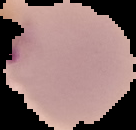

In [5]:
from PIL import Image
Image.open(DATA_DIR + 'Parasitized/' + parasitized_images[0])

In [13]:
import cv2
image = cv2.imread(DATA_DIR + 'Parasitized/' + parasitized_images[0])
image.shape

(130, 136, 3)

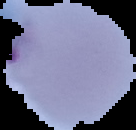

In [14]:
from PIL import Image
image = Image.fromarray(image, 'RGB')
image

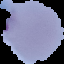

In [15]:
image = image.resize((SIZE, SIZE))
image

In [16]:
import numpy as np
a = np.array(image)
a.shape

(64, 64, 3)

In [17]:
dataset = []
label   = []

In [18]:
for i, image_name in enumerate(parasitized_images):
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(DATA_DIR + 'Parasitized/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(0)

In [20]:
len(dataset)

500

In [21]:
uninfected_images = os.listdir(DATA_DIR + 'Uninfected/')

In [22]:
for i, image_name in enumerate(uninfected_images):
    if (image_name.split('.')[1] == 'png'):
        image = cv2.imread(DATA_DIR + 'Uninfected/' + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((SIZE, SIZE))
        dataset.append(np.array(image))
        label.append(1)

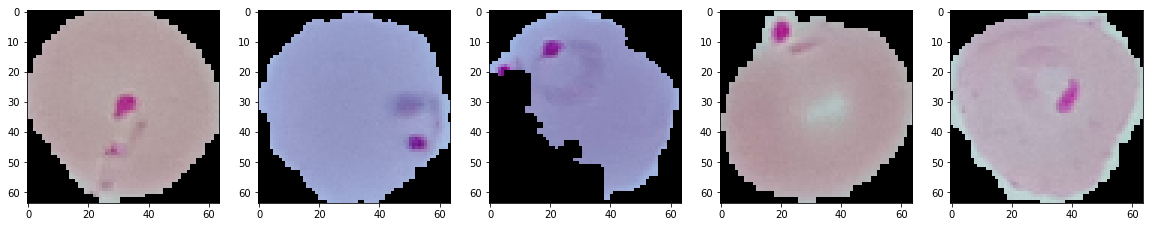

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (20, 12))
for index, image_index in enumerate(np.random.randint(len(parasitized_images), size = 5)):
    plt.subplot(1, 5, index+1)
    plt.imshow(dataset[image_index])

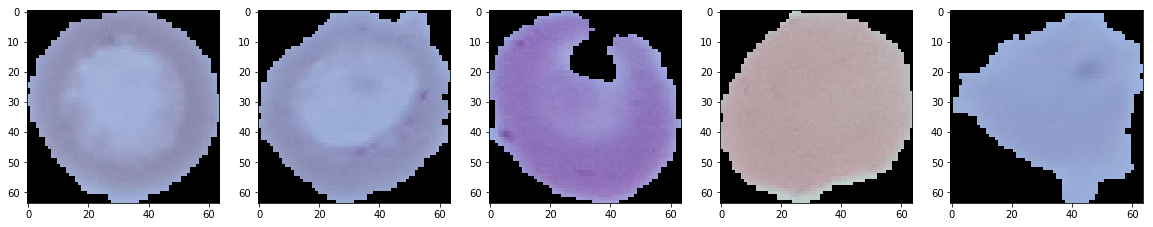

In [27]:
plt.figure(figsize = (20, 12))
for index, image_index in enumerate(np.random.randint(len(uninfected_images), size = 5)):
    plt.subplot(1, 5, index+1)
    plt.imshow(dataset[len(parasitized_images) + image_index])

## 使用Keras 建立卷積神經網路

In [28]:
import keras
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.models import Sequential

Using TensorFlow backend.


In [31]:
classifier = Sequential()
classifier.add(Convolution2D(32, (3, 3), 
                input_shape = (SIZE, SIZE, 3), 
                activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))
               
classifier.add(Convolution2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))
               

In [32]:
classifier.add(Flatten())
classifier.add(Dense(activation = 'relu', units=512))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))

classifier.add(Dense(activation = 'relu', units=256))
classifier.add(BatchNormalization(axis = -1))
classifier.add(Dropout(0.2))

classifier.add(Dense(activation = 'sigmoid', units=2))

Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [33]:
classifier.compile(optimizer = 'adam', 
                   loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'])
print(classifier.summary())


Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 31, 31, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0      

In [35]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset, to_categorical(np.array(label)), test_size = 0.20, random_state = 0)

In [37]:
len(X_train)

800

In [38]:
len(X_test)

200

In [41]:
history = classifier.fit(np.array(X_train), 
                         y_train, 
                         batch_size = 64, 
                         verbose = 1, 
                         epochs = 10, 
                         validation_split = 0.1,
                         shuffle = False)

Train on 720 samples, validate on 80 samples
Epoch 1/10
720/720 [==============================] - 3s 4ms/step - loss: 0.0130 - acc: 0.9889 - val_loss: 1.3350 - val_acc: 0.6750
Epoch 2/10
720/720 [==============================] - 3s 4ms/step - loss: 0.0111 - acc: 0.9917 - val_loss: 1.5972 - val_acc: 0.6375
Epoch 3/10
720/720 [==============================] - 3s 4ms/step - loss: 0.0116 - acc: 0.9889 - val_loss: 0.7779 - val_acc: 0.8125
Epoch 4/10
720/720 [==============================] - 3s 4ms/step - loss: 0.0083 - acc: 0.9931 - val_loss: 0.7269 - val_acc: 0.8250
Epoch 5/10
720/720 [==============================] - 3s 4ms/step - loss: 0.0101 - acc: 0.9917 - val_loss: 1.1034 - val_acc: 0.7375
Epoch 6/10
720/720 [==============================] - 3s 4ms/step - loss: 0.0093 - acc: 0.9917 - val_loss: 0.9217 - val_acc: 0.7500
Epoch 7/10
720/720 [==============================] - 3s 4ms/step - loss: 0.0070 - acc: 0.9944 - val_loss: 0.9413 - val_acc: 0.7750
Epoch 8/10
720/720 [===========

In [46]:
predicted = classifier.predict(np.array(X_test)).argmax(axis = 1)

In [50]:
res = y_test.argmax(axis = 1)

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(res,predicted)

0.825

In [52]:
confusion_matrix(res, predicted)

array([[97,  1],
       [34, 68]])

## Data Augmentation

In [53]:
from keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rescale = 1/255, # 把像素標準化為0~1範圍
                                     zoom_range = 0.3, # 把圖片縮放
                                     horizontal_flip = True, # 把圖片水平翻轉
                                     rotation_range = 30) #將圖旋轉

test_generator = ImageDataGenerator(rescale = 1/255)

In [54]:
train_generator = train_generator.flow(np.array(X_train),
                                       y_train,
                                       batch_size = 64,
                                       shuffle = False)

In [55]:
test_generator = test_generator.flow(np.array(X_test),
                                     y_test,
                                     batch_size = 64,
                                     shuffle = False)

In [64]:
?classifier.fit_generator

In [67]:
history = classifier.fit_generator(train_generator,
                                   steps_per_epoch = len(X_train)/64,
                                   epochs = 10,
                                   validation_data=(np.array(X_test),y_test),
                                   shuffle = False)

Epoch 1/10
13/12 [===============================] - 3s 267ms/step - loss: 0.1047 - acc: 0.9482 - val_loss: 7.8979 - val_acc: 0.5100
Epoch 2/10
13/12 [===============================] - 3s 261ms/step - loss: 0.0959 - acc: 0.9483 - val_loss: 7.8979 - val_acc: 0.5100
Epoch 3/10
13/12 [===============================] - 3s 254ms/step - loss: 0.0908 - acc: 0.9567 - val_loss: 7.8979 - val_acc: 0.5100
Epoch 4/10
13/12 [===============================] - 3s 253ms/step - loss: 0.1018 - acc: 0.9495 - val_loss: 7.8979 - val_acc: 0.5100
Epoch 5/10
13/12 [===============================] - 3s 267ms/step - loss: 0.0970 - acc: 0.9471 - val_loss: 7.8979 - val_acc: 0.5100
Epoch 6/10
13/12 [===============================] - 3s 263ms/step - loss: 0.0878 - acc: 0.9507 - val_loss: 7.8979 - val_acc: 0.5100
Epoch 7/10
13/12 [===============================] - 3s 252ms/step - loss: 0.0976 - acc: 0.9506 - val_loss: 7.8979 - val_acc: 0.5100
Epoch 8/10
13/12 [===============================] - 4s 278ms/step - 

In [62]:
classifier.predict(np.array(X_test)).argmax(axis = 1)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

## 寫網路爬蟲抓取圖片

In [69]:
import requests
from bs4 import BeautifulSoup
apiurl = 'https://www.google.com.tw/search?ei=_FscXfyuFJyEr7wPtJeIgAQ&yv=3&q={}&tbm=isch&vet=10ahUKEwj8nNzUn5jjAhUcwosBHbQLAkAQuT0IYSgB._FscXfyuFJyEr7wPtJeIgAQ.i&ved=0ahUKEwj8nNzUn5jjAhUcwosBHbQLAkAQuT0IYSgB&ijn=2&start={}&asearch=ichunk&async=_id:rg_s,_pms:s,_fmt:pc'
res = requests.get(apiurl.format('林志玲', 0))
soup = BeautifulSoup(res.text, 'lxml')

In [78]:
import os
if not os.path.exists('idol1/'):
    os.mkdir('idol1/')

for ele in soup.select('img'):
    if ele.get('src'):
        link = ele.get('src')
        res2 = requests.get(link)
        with open('idol1/'+link.split('tbn:')[1] + '.jpg' , 'wb') as f:
            f.write(res2.content)

In [79]:
def getIdolPicture(idol, destdir):
    apiurl = 'https://www.google.com.tw/search?ei=_FscXfyuFJyEr7wPtJeIgAQ&yv=3&q={}&tbm=isch&vet=10ahUKEwj8nNzUn5jjAhUcwosBHbQLAkAQuT0IYSgB._FscXfyuFJyEr7wPtJeIgAQ.i&ved=0ahUKEwj8nNzUn5jjAhUcwosBHbQLAkAQuT0IYSgB&ijn=2&start={}&asearch=ichunk&async=_id:rg_s,_pms:s,_fmt:pc'
    for p in range(3):
        res = requests.get(apiurl.format(idol, p * 100))
        soup = BeautifulSoup(res.text, 'lxml')
        import os
        if not os.path.exists(destdir):
            os.mkdir(destdir)

        for ele in soup.select('img'):
            if ele.get('src'):
                link = ele.get('src')
                res2 = requests.get(link)
                with open(destdir+link.split('tbn:')[1] + '.jpg' , 'wb') as f:
                    f.write(res2.content)

In [80]:
getIdolPicture('林志玲', 'idol1/')

In [84]:
getIdolPicture('蔡依林', 'idol2/')

In [82]:
getIdolPicture('林憶蓮', 'idol3/')

## 擷取人臉部位
- https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

In [86]:
import cv2 as cv

In [87]:
face_cascade = cv.CascadeClassifier('/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/cv2/data/haarcascade_frontalface_default.xml')


In [89]:
#import os
#os.listdir('idol1/')


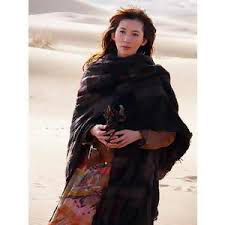

In [92]:
from PIL import Image
im = Image.open('idol1/ANd9GcTx44yU5DW2rjNTWTJxHuVm3JWXlNWj3yc6cWAT4FQbARo7Pgyj.jpg')
im

In [93]:
img = cv.imread('idol1/ANd9GcTx44yU5DW2rjNTWTJxHuVm3JWXlNWj3yc6cWAT4FQbARo7Pgyj.jpg')
faces = face_cascade.detectMultiScale(img, 1.3, 5)
faces

array([[110,  19,  37,  37]], dtype=int32)

In [94]:
faces[0]

array([110,  19,  37,  37], dtype=int32)

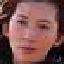

In [95]:
(x,y,w,h) = faces[0]
box = (x, y, x+w, y+h)
crpim = im.crop(box).resize((64,64))
crpim

In [100]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
face_cascade = cv.CascadeClassifier('/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/cv2/data/haarcascade_frontalface_default.xml')
from PIL import Image
def extractFace(src_dir, dest_dir):
    if not os.path.exists(dest_dir):
        os.mkdir(dest_dir)
    for filename in os.listdir(src_dir):   
        if '.jpg' in filename:
            img = cv.imread(src_dir + filename)
            faces = face_cascade.detectMultiScale(img, 1.3, 5)
            im = Image.open(src_dir + filename)
            for (x,y,w,h) in faces:
                box = (x, y, x+w, y+h)
                crpim = im.crop(box).resize((64,64))
                crpim.save(dest_dir + filename)

In [104]:
extractFace('idol1/', 'idol1_face/')

In [105]:
extractFace('idol2/', 'idol2_face/')

In [106]:
extractFace('idol3/', 'idol3_face/')

## 使用卷積神經網路辨識臉孔

In [107]:
from keras.models import Sequential 
from keras.layers import Conv2D
from keras.layers import MaxPooling2D 
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()

# Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64,
3), activation = 'relu'))

# Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Convolution
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

# Max Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Flattening
classifier.add(Flatten())

# Fully Connected
classifier.add(Dense(units = 128, activation = 'relu')) 
classifier.add(Dense(units = 3, activation = 'softmax'))

classifier.compile(optimizer = 'adam', 
                        loss ='categorical_crossentropy', 
                     metrics = ['accuracy'])

In [108]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,     #x坐标保持不变，而对应的y坐标按比例发生平移
                                   zoom_range = 0.2,      #可以让图片在长或宽的方向进行放大
                                   horizontal_flip = True #水平翻转操作
                                  )

In [109]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [111]:
training_set = train_datagen.flow_from_directory(
    'trainset/', target_size = (64, 64),
     batch_size = 10,
     class_mode = 'categorical')

Found 87 images belonging to 3 classes.


In [113]:
history = classifier.fit_generator(training_set,
                         epochs = 10,
                         verbose = 1)

Epoch 1/10
9/9 [==============================] - 0s 38ms/step - loss: 0.0564 - acc: 0.9889
Epoch 2/10
9/9 [==============================] - 0s 45ms/step - loss: 0.0521 - acc: 0.9889
Epoch 3/10
9/9 [==============================] - 0s 46ms/step - loss: 0.0324 - acc: 1.0000
Epoch 4/10
9/9 [==============================] - 0s 47ms/step - loss: 0.1632 - acc: 0.9623
Epoch 5/10
9/9 [==============================] - 0s 45ms/step - loss: 0.0674 - acc: 0.9666
Epoch 6/10
9/9 [==============================] - 0s 37ms/step - loss: 0.1028 - acc: 0.9777
Epoch 7/10
9/9 [==============================] - 0s 44ms/step - loss: 0.0830 - acc: 0.9777
Epoch 8/10
9/9 [==============================] - 0s 32ms/step - loss: 0.1262 - acc: 0.9443
Epoch 9/10
9/9 [==============================] - 0s 34ms/step - loss: 0.1232 - acc: 0.9666
Epoch 10/10
9/9 [==============================] - 0s 43ms/step - loss: 0.1464 - acc: 0.9443


In [122]:
res = requests.get('https://driver.cool3c.com/files/3/7db0751a-94dc-4f3c-b525-65bc1f4592dc.jpg')
with open('test.jpg', 'wb') as f:
    f.write(res.content)

In [123]:
from PIL import Image
im = Image.open('test.jpg')

In [125]:
img = cv.imread('test.jpg')
faces = face_cascade.detectMultiScale(img, 1.3, 5)
faces

array([[284, 111, 209, 209]], dtype=int32)

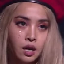

In [126]:
(x,y,w,h) = faces[0]
box = (x, y, x+w, y+h)
crpim = im.crop(box).resize((64,64))
crpim

In [127]:
crpim.save('test2.jpg')

In [131]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('test2.jpg', target_size= (64,64))
test_image = image.img_to_array(test_image)

type(test_image)

numpy.ndarray

In [132]:
test_image.shape

(64, 64, 3)

In [133]:
test_image = np.expand_dims(test_image, axis = 0)
test_image.shape

(1, 64, 64, 3)

In [136]:
training_set.class_indices

{'idol1_face': 0, 'idol2_face': 1, 'idol3_face': 2}

In [137]:
classifier.predict_classes(test_image)

array([1])

In [138]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 387       
Total para

In [139]:
classifier.save('model.pickle')

In [140]:
c2 = keras.models.load_model('model.pickle')

In [141]:
classifier.predict_classes(test_image)

array([1])